In [51]:
import numpy as np

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, transpile

from IPython.display import Math
from qc_workbook.show_state import statevector_expr

#########################################################################
#
#
def get_statevector_array(circuit):
    circuit = circuit.copy()
    circuit.save_statevector()
    circuit = transpile(circuit, backend=simulator)
    job = simulator.run(circuit)
    result = job.result()
    qiskit_statevector = result.data()['statevector']

    return np.asarray(qiskit_statevector), result

#########################################################################
#
#
simulator = AerSimulator(method='statevector')
print(simulator.name)

aer_simulator_statevector


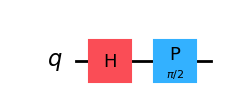

In [52]:
##############################################################
#
#  Q1.  1 qubic,  calc the following quantum state
#       1/sqrt(2) * ( |0> + i |1> )
#
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.p(np.pi/2.,0)

circuit.draw('mpl')

#circuit.u(np.pi/2., np.pi/2., 0., 0)

In [53]:
expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)


<IPython.core.display.Math object>

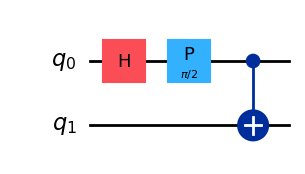

In [54]:
##############################################################
#
#  Q2.  2 qubics,  calc the following quantum state
#       1/sqrt(2) * ( |0> + i |3> )
#
circuit = QuantumCircuit(2)

circuit.h(0)
circuit.p(np.pi/2., 0)
circuit.cx(0, 1)

circuit.draw('mpl')

In [55]:
expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)

<IPython.core.display.Math object>

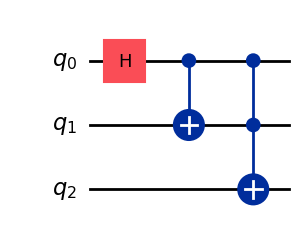

In [56]:
##############################################################
#
#  Q3.  3 qubics,  calc the following quantum state: GHZ state
#       1/sqrt(2) * ( |0> + |7> )
#
circuit = QuantumCircuit(3)

circuit.h(0)
circuit.cx(0, 1)
circuit.mcx([0, 1], 2)

circuit.draw('mpl')

In [57]:
expr = statevector_expr(circuit, amp_norm=(np.sqrt(0.5), r'\frac{1}{\sqrt{2}}'))
Math(expr)

<IPython.core.display.Math object>

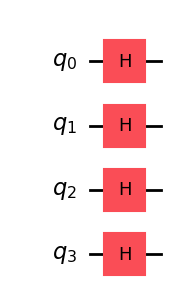

In [58]:
##############################################################
#
#  Q4.  n qubics,  calc the following quantum state
#                     2**n-1
#       1/sqrt(2**n) sigma ( |k> )
#                     k=0
#
num_qubits = 4
circuit = QuantumCircuit(num_qubits)

for i in range(num_qubits):   
    circuit.h(i)

circuit.draw('mpl')

In [59]:
sqrt_2_to_n = 2**(num_qubits // 2)
expr = statevector_expr(circuit, amp_norm=(1./sqrt_2_to_n, r'\frac{1}{%d}' % sqrt_2_to_n))
Math(expr)

<IPython.core.display.Math object>

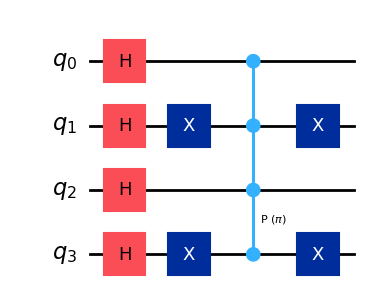

In [60]:
##############################################################
#
#  Q5.  4 qubics,  flip |5>
#
num_qubits = 4

circuit = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    circuit.h(i)

circuit.x(1)
circuit.x(3)
circuit.mcp(np.pi, [0,1,2], 3)
circuit.x(1)
circuit.x(3)

circuit.draw('mpl')


In [61]:
sqrt_2_to_n = 2**(num_qubits // 2)
expr = statevector_expr(circuit, amp_norm=(1./sqrt_2_to_n, r'\frac{1}{%d}' % sqrt_2_to_n))
Math(expr)

<IPython.core.display.Math object>

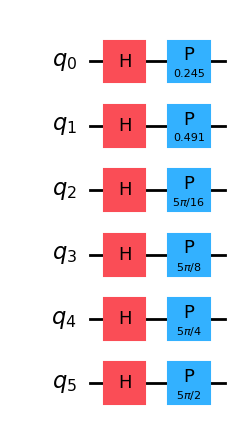

In [62]:
##############################################################
#
#                              2^n-1
#  Q6.  6 qubics,  1 / sqrt(2) sigma exp(2*pi* sk/2^n *i) * |k>
#                               k=0
#       n = 6, s = 2.5
#
num_qubits = 6

circuit = QuantumCircuit(num_qubits)

s = 2.5

for m in range(num_qubits):
    circuit.h(m)
    circuit.p(2. * np.pi * s / (2**(num_qubits-m) ), m)
 
circuit.draw('mpl')


In [63]:
sqrt_2_to_n = 2**(num_qubits // 2)
amp_norm = (1./sqrt_2_to_n, r'\frac{1}{%d}' % sqrt_2_to_n)
phase_norm = (2 * np.pi / (2 ** num_qubits), r'\frac{2\pi i}{%d}' % (2**num_qubits))
expr = statevector_expr(circuit, amp_norm, phase_norm=phase_norm)
Math(expr)

<IPython.core.display.Math object>

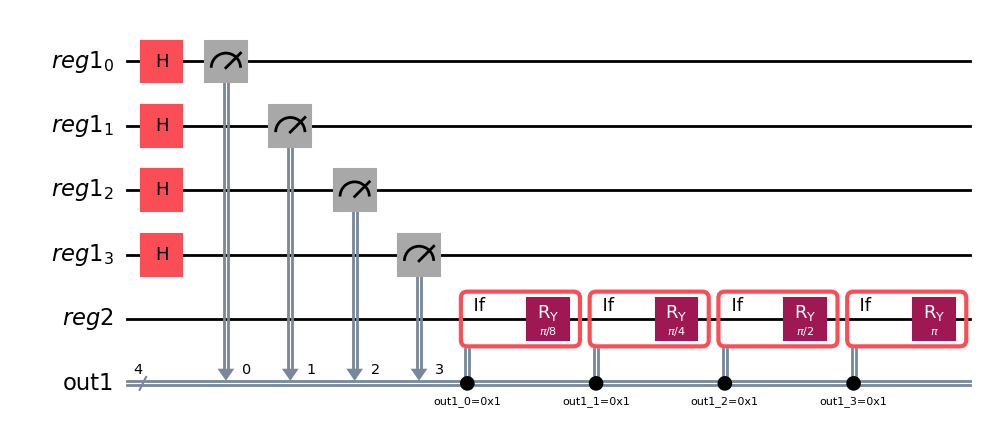

In [64]:
##############################################################
#
#  Condition
#
register1 = QuantumRegister(4, name="reg1")
register2 = QuantumRegister(1, name="reg2")
output1 = ClassicalRegister(4, name="out1")

circuit = QuantumCircuit(register1, register2, output1)

circuit.h(register1)
circuit.measure(register1, output1)

dtheta = 2. * np.pi / 16.

for idx in range(4):
    angle = dtheta * (2**idx)
    with circuit.if_test((output1[idx],1)):
        circuit.ry(angle, register2[0])
        
circuit.draw('mpl')


In [65]:
Math(statevector_expr(circuit, register_sizes=[4,1]))

<IPython.core.display.Math object>

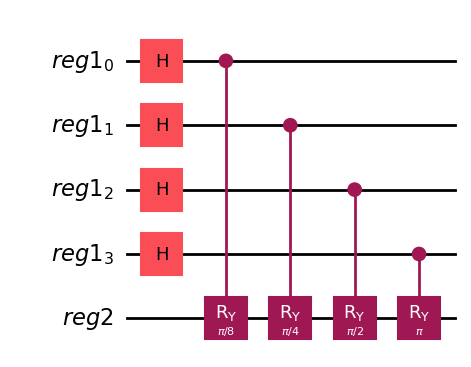

In [67]:
##############################################################
#
#  Condition 2
#
register1 = QuantumRegister(4, name="reg1")
register2 = QuantumRegister(1, name="reg2")

circuit = QuantumCircuit(register1, register2)

circuit.h(register1)

dtheta = 2. * np.pi / 16.

for idx in range(4):
    circuit.cry(dtheta * (2 ** idx), register1[idx], register2[0])
        
circuit.draw('mpl')


In [68]:
lines = statevector_expr(circuit, register_sizes=[4,1], terms_per_row=6)
for line in lines:
    display(Math(line))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>